# SETUP

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import random
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import textwrap as twp

from turtle import color
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'

In [3]:
pd.read_excel("BaseDatosAtlasMunicipalODSBolivia2020_Excel.xlsx", None).keys()
sheet_names = ['Tapa', 'Descripción de indicadores', 'Datos Depto', 'Datos Muni', 'Indices Depto', 'Indices Muni']
print("SHEET NAMES: ")
print(list(sheet_names))
tapa = list(pd.read_excel("BaseDatosAtlasMunicipalODSBolivia2020_Excel.xlsx", 0, index_col=2, header=3).index.dropna())
atribucion = "Andersen, L. E., Canelas, S., Gonzales, A., Peñaranda, L. (2020) Atlas municipal de los Objetivos de Desarrollo Sostenible en Bolivia 2020. La Paz: Universidad Privada Boliviana, SDSN Bolivia."
print("\nTapa:", tapa)

SHEET NAMES: 
['Tapa', 'Descripción de indicadores', 'Datos Depto', 'Datos Muni', 'Indices Depto', 'Indices Muni']

Tapa: ['Por favor citar el Atlas y los datos del Atlas de la siguiente manera: ', 'Andersen, L. E., Canelas, S., Gonzales, A., Peñaranda, L. (2020) Atlas municipal de los Objetivos de Desarrollo Sostenible en Bolivia 2020. La Paz: Universidad Privada Boliviana, SDSN Bolivia.', 'Libro completo con metodología disponible aquí: https://www.sdsnbolivia.org/Atlas', 'Contenido del Excel:', 'Descripción de indicadores', 'Datos Departamentales', 'Datos Municipales', 'Índices a nivel Departamental', 'Índices a nivel Municipal']


In [4]:
info = pd.read_excel("BaseDatosAtlasMunicipalODSBolivia2020_Excel.xlsx", 1, header=1, index_col="Indicador")
info = info.drop("Unnamed: 0", axis=1)
info

,ODS,Nombre indicador,Descripción indicador,Descripción valores absolutos,Fuente
Indicador,,,,,
sdg1_1_ee,NaN,"Tasa de pobreza energética extrema, 2016 (% de...",Porcentaje de viviendas que consumen menos del...,Número de viviendas que consumen menos del 25%...,"Andersen, L. E., B. Branisa & F. Calderón (201..."
sdg1_1_nbi,NaN,"Necesidades Básicas Insatisfechas, 2012 (% de ...",Porcentaje de la población con Necesidades Bás...,Población con necesidades básicas insatisfecha...,"Instituto Nacional de Estadísticas (INE), Cens..."
sdg1_2_pm,NaN,"Índice de Pobreza Multidimensional, 2012",Índice de Pobreza Multidimensional (2012),Número de hogares con falencias en 4 o más dim...,"Índice de Pobreza Multidimensional, elaborado ..."
sdg1_4_ssb,NaN,"Acceso a los 3 servicios básicos, 2012 (% de h...",Porcentaje de hogares con acceso a los 3 servi...,Número de hogares que carecen de al menos uno ...,"Instituto Nacional de Estadísticas (INE), Cens..."
sdg2_2_dm,2.0,"Desnutrición crónica en niños (< 5 años), 2016...",Porcentaje de menores de 5 años con desnutrici...,Número de niños menores de 5 años con desnutri...,Elaboración propia en base a datos de la Encue...
...,...,...,...,...,...
sdg16_1_vh,NaN,"Tasa de homicidios registrados, promedio 2015-...","Tasa anual de homicidios registrados, promedio...","Número de homicidios registrados, 2015-2017",Elaborado por el Observatorio Boliviano de Seg...
sdg16_6_ce,NaN,Capacidad de ejecución del presupuesto program...,"Ejecución presupuestaria, 2017 (Presupuesto ej...","Presupuesto Operativo Annual (POA) en Bs., 2017",Ministerio de Economía y Finanzas Públicas
sdg16_9_nrc,NaN,Niños inscritos en el registro civil (< 5 años...,Porcentaje de niños menores de 5 años cuyo nac...,Número de niños menores de 5 años que no están...,"Instituto Nacional de Estadísticas (INE), Cens..."


In [5]:
df_depart = pd.read_excel("BaseDatosAtlasMunicipalODSBolivia2020_Excel.xlsx", 2,header=2, index_col=1)
df_depart = df_depart.drop("Unnamed: 0", axis=1)
df_depart = df_depart.rename(columns={"Unnamed: 2": "departamento"})
df_depart = df_depart.drop(columns=[i for i in df_depart.columns if i.startswith("Unnamed")])
df_depart = df_depart.replace(".", np.nan)
df_depart

,departamento,Índice Municipal de Desarrollo Sostenible,Ranking del Índice de Bolivia,Población 2020,Tasa de urbanización 2012 (% de la población),"Tasa de pobreza energética extrema, 2016 (% de viviendas)","Número de viviendas que consumen menos del 25% del límite de Tarifa Dignidad (210 kWh/año), 2016","Necesidades Básicas Insatisfechas, 2012 (% de población)","Población con necesidades básicas insatisfechas, 2012","Índice de Pobreza Multidimensional, 2012",...,"Pérdida de Riqueza Absoluta de Especies, 2016-2018 (% de la pérdida nacional)","Tasa de homicidios registrados, promedio 2015-2017 (por 100,000 habitantes)","Número de homicidios registrados, 2015-2017","Capacidad de ejecución del presupuesto programado, 2017 (%)","Presupuesto Operativo Annual (POA) en Bs., 2017","Niños inscritos en el registro civil (< 5 años), 2012 (%)","Número de niños menores de 5 años que no están registrados en un registro civil, 2012","Proporción de ingresos municipales que provienen de impuestos locales, 2017 (%)","Inversión pública per cápita, 2017 (Bs./persona)","Inversión pública total, 2017 (Bs.)"
1,Chuquisaca,56.668972,6.0,637013,48.701206,47.700052,74043,54.526954,305189,0.169267,...,0.883200,1.244394,23,80.178504,1503300600,90.727511,7061,7.871806,662.702186,4.116361e+08
2,La Paz,63.676028,2.0,2926996,66.712707,40.998096,362753,46.293529,1227809,0.079992,...,8.987929,5.734977,489,82.500408,5513039402,92.798977,22364,17.649897,512.621621,1.467381e+09
3,Cochabamba,63.538707,3.0,2028639,68.126763,34.319514,188410,45.453331,779201,0.106715,...,4.186000,2.331603,134,79.452515,4876690246,89.748626,23017,16.380413,852.886755,1.657525e+09
4,Oruro,59.645183,5.0,551116,64.044748,43.538228,69416,46.977751,225543,0.099061,...,0.000000,2.853315,45,78.018040,1380613778,91.501779,5446,12.130198,845.095871,4.494980e+08
5,Potosí,52.622496,7.0,901555,40.624906,62.988733,157304,59.748991,479451,0.166663,...,0.000000,0.762844,20,69.984465,2083822367,88.698393,12907,4.166682,716.813425,6.312625e+08
6,Tarija,66.018426,1.0,583330,65.046182,30.680709,41824,34.592504,158864,0.050918,...,1.133335,1.533548,25,74.311384,1894433117,91.385901,5070,10.851022,1045.128342,5.783458e+08
7,Santa Cruz,62.603143,4.0,3370059,81.293171,29.192522,208327,35.470450,908245,0.050775,...,67.658411,2.089856,193,80.864195,6447454712,84.438854,55114,23.619131,535.998503,1.689294e+09
8,Beni,52.253584,8.0,480308,73.147902,32.022285,31886,56.418429,228344,0.152389,...,13.769647,4.167562,57,79.334679,880115605,85.351210,9418,5.390779,359.279292,1.660161e+08
9,Pando,51.027908,9.0,154355,48.744069,36.455135,11014,58.843478,60730,0.198641,...,3.381477,1.492805,6,73.667455,560366314,88.651994,1980,2.410889,947.460936,1.317141e+08
0,Bolivia,NaN,NaN,11633371,67.485678,38.448785,1144977,44.917258,4373376,0.093630,...,100.000000,3.010088,992,79.142294,25139836141,88.914091,142377,16.199818,644.430364,7.182673e+09


In [6]:
df_mun = pd.read_excel("BaseDatosAtlasMunicipalODSBolivia2020_Excel.xlsx", 3,header=2)
df_mun = df_mun.drop("Unnamed: 0", axis=1)
df_mun = df_mun.drop(columns=[i for i in df_mun.columns if i.startswith("Unnamed")])
df_mun = df_mun.replace(".", np.nan)

df_mun

,Código,Municipio,Departamento,Índice Municipal de Desarrollo Sostenible,Ranking del Índice de Bolivia,Población 2020,"Tasa de urbanización, 2012 (% de población)","Tasa de pobreza energética extrema, 2016 (% de viviendas)","Número de viviendas que consumen menos del 25% del límite de Tarifa Dignidad (210 kWh/año), 2016","Necesidades Básicas Insatisfechas, 2012 (% de población)",...,"Pérdida de Riqueza Absoluta de Especies, 2016-2018 (% de la pérdida nacional)","Tasa de homicidios registrados, promedio 2015-2017 (por 100,000 habitantes)","Número de homicidios registrados, 2015-2017","Capacidad de ejecución del presupuesto programado, 2017 (%)","Presupuesto Operativo Annual (POA) en Bs., 2017","Niños inscritos en el registro civil (< 5 años), 2012 (%)","Número de niños menores de 5 años que no están registrados en un registro civil, 2012","Proporción de ingresos municipales que provienen de impuestos locales, 2017 (%)","Inversión pública per cápita, 2017 (Bs./persona)","Inversión pública total, 2017 (Bs.)"
0,10101,Sucre,Chuquisaca,69.582053,5,295476,91.4,23.765676,17473.0,26.871265,...,0.000051,2.372924,20,86.205620,737627253,94.156170,1865,15.919012,671.308350,1.910114e+08
1,10102,Yotala,Chuquisaca,55.501551,75,10017,0.0,45.806933,1229.0,54.406515,...,0.000000,0.000000,0,65.516520,21577261,95.684114,47,3.390278,478.432770,4.746053e+06
2,10103,Poroma,Chuquisaca,35.662371,339,18947,0.0,96.050020,4839.0,95.943875,...,0.000000,1.811332,1,78.814679,31727744,85.178441,407,0.027649,475.135376,8.806159e+06
3,10201,Azurduy,Chuquisaca,37.926692,333,10948,0.0,86.848341,2199.0,87.749537,...,0.004009,0.000000,0,75.650322,32003762,88.009889,194,0.100616,997.513977,1.093475e+07
4,10202,Tarvita,Chuquisaca,39.974894,327,14688,0.0,86.095629,2935.0,86.932875,...,0.004071,0.000000,0,83.113015,32967137,85.707269,291,0.151069,625.205200,9.179263e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,90401,Santa Rosa,Pando,48.207247,217,2506,0.0,NaN,NaN,73.299398,...,0.170120,0.000000,0,79.593074,11766583,84.010152,63,0.000000,1056.830566,2.648417e+06
335,90402,Ingavi,Pando,43.623216,295,1840,0.0,NaN,NaN,86.695545,...,0.062554,0.000000,0,81.806600,11270615,75.075988,82,0.000000,2481.558594,4.451916e+06
336,90501,Nueva Esperanza,Pando,46.017078,273,2422,0.0,NaN,NaN,87.916431,...,0.120902,0.000000,0,65.138865,13017445,85.714286,43,0.000000,1290.759766,3.024250e+06
337,90502,Villa Nueva-Loma Alta,Pando,43.039756,305,3209,0.0,NaN,NaN,86.611630,...,0.059590,0.000000,0,76.906151,14426911,85.249042,77,0.000000,1308.056641,4.088985e+06


In [7]:
lista_indicadores_mun = list(df_mun.loc[:,"Índice Municipal de Desarrollo Sostenible":].columns)
# lista_indicadores_mun

<AxesSubplot:>

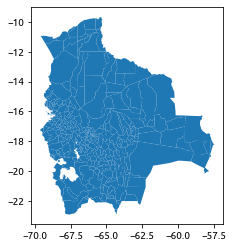

In [8]:
# municipios geojson
df_map = gpd.read_file("https://raw.githubusercontent.com/dquintani/vacunacion-municipios-bo/master/other/geo/municipios.339.geojson")
df_map['CODIGO'] = df_map['CODIGO'].str[1:]
df_map = df_map.rename(columns={"CODIGO": "cod_ine"})
df_map = df_map.dropna().reset_index().drop(columns = ["index"])
df_map["cod_ine"] = df_map["cod_ine"].astype(int)

df_map.plot()

# PLOT: plot_mapa_municipal()

,departamento,"Cobertura de parto institucional, promedio 2008-2012 (%)"
0,Bolivia,73.859506


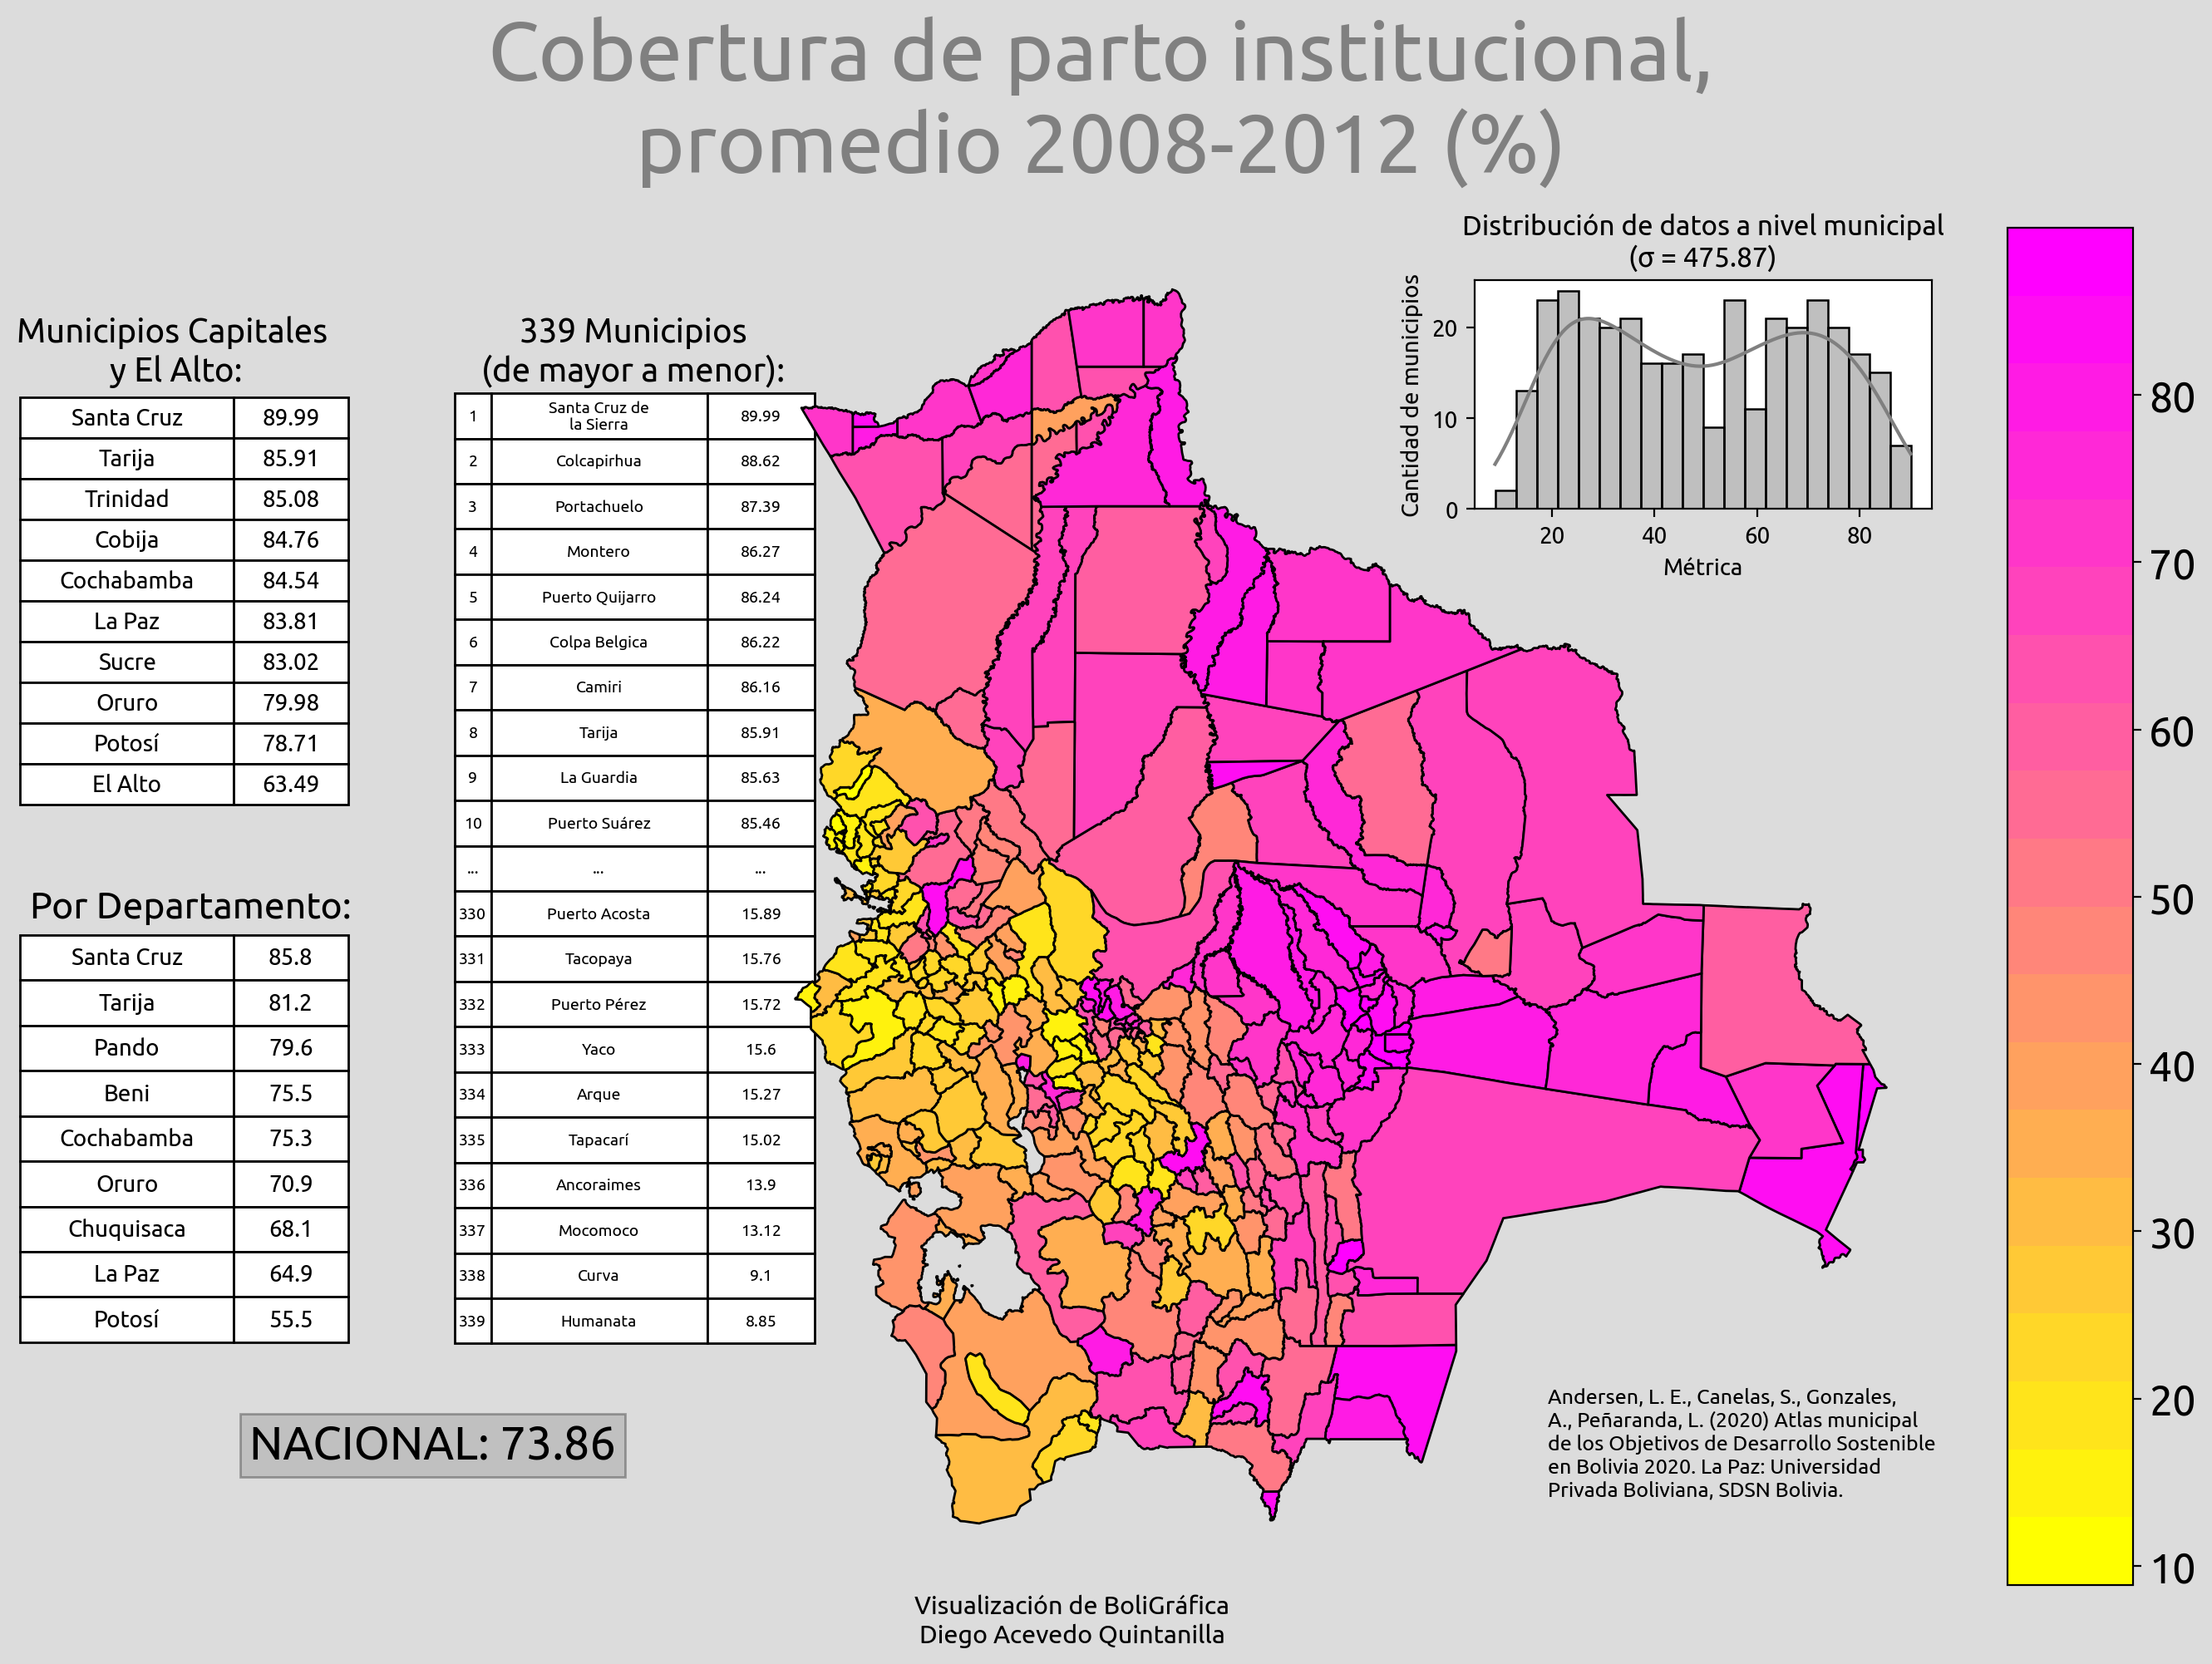

In [11]:
def plot_mapa_municipal(indicador, cmap = "plasma", per_extreme_count = 10):


    # DATOS

    df = df_map.merge(df_mun, right_on="Código", left_on="cod_ine")
    df_indicador = df.loc[:,["cod_ine", "Municipio", "Departamento", indicador, "geometry"]]
    df_indicador[indicador] = df_indicador[indicador].astype(float)




    # MAPA

    fig, axs = plt.subplots(1,1, figsize=(11,11), dpi=200)
    axs.set_title(f"{twp.fill(indicador, 36)}", fontsize = 36, color="gray", y=1.03, x=.3)
    fig.set_facecolor("gainsboro") ##131329
    axs.axis("off")


    cmap = plt.get_cmap(cmap, 20) #inferno, PiYG, PRGn, PuOr
    divider = make_axes_locatable(axs)
    cax = divider.append_axes("right", size="10%", pad=0.25,)
    cax.tick_params(labelsize=18)

    df_indicador.plot(column=indicador,
                     ax=axs, 
                     legend=True, 
                     cax=cax, 
                     cmap=cmap,
                     facecolor="black", 
                     edgecolor="black",
                     # norm=plt.Normalize(0, 100),
                     )







    # TABLAS


    # LOS EXTREMOS
    altos_df = df_indicador.sort_values(indicador, ascending=False)#.iloc[:10,:]
    altos_df = altos_df.loc[:,['Municipio', indicador]]
    altos_df = altos_df.round(2).reset_index().reset_index().drop(columns="index")
    altos_df["level_0"] = altos_df["level_0"]+1
    altos_df.Municipio = [twp.fill(i,15) for i in altos_df.Municipio]
    altos = altos_df.iloc[:10,:]
    bajos = altos_df.iloc[-10:,:]
    extremos = pd.concat([altos, bajos], axis=0)
    extremos.loc[10] = ["...", "...", "..."]
    extremos = extremos.sort_index()

    fig.text(x=0.08, y=.79, s="339 Municipios\n(de mayor a menor):", fontsize=14.5, ha="center")
    table_altos = axs.table(extremos.values,
                           bbox = [-.238, .178, 0.3, 0.7],
                           colWidths=[.1,.6,.3],
                           cellLoc="center") 



    # CAPITALES Y EL ALTO
    capitales_df = df_indicador[df_indicador.cod_ine.isin([10101, 20101, 30101, 40101, 50101, 60101, 70101, 80101, 90101, 20105])]
    capitales_df = capitales_df.loc[:,['Municipio', indicador]]
    capitales_df = capitales_df.replace({"Santa Cruz de la Sierra":"Santa Cruz"}).round(2).sort_values(indicador, ascending=False)

    fig.text(x=-.17, y=.79, s="Municipios Capitales \ny El Alto:", fontsize=14.5, ha="center")
    table_capitales = axs.table(capitales_df.values,
                               bbox = [-.6,.575, 0.273, 0.3],
                               colWidths=[.65,.35],
                               cellLoc="center")






    # por DEPARTAMENTO
    dept = df_depart[['departamento', indicador]].round(1).sort_values(indicador, ascending=False)
    dept = dept[dept.departamento!="Bolivia"]
    # display(dept)


    fig.text(x=-0.25, y=.496, s="Por Departamento:", fontsize=16)
    table_dept = axs.table(dept.values,
                          bbox = [-.6,.1789, 0.273, 0.3],
                          colWidths=[.65,.35],
                          cellLoc="center") 


    # NACIONAL
    nacional = df_depart[['departamento', indicador]]
    nacional =  nacional[nacional.departamento=="Bolivia"]
    display(nacional)
    fig.text(x=-0.13, y=.2, s=f"NACIONAL: {nacional[indicador].values[0].round(2)}", fontsize=20,
            bbox={"alpha":.3, "facecolor":"grey"})


    # DISTRIBUCION
    ax2 = fig.add_axes([0.5399, 0.72, 0.25, 0.125])

    sns.histplot(data = df_indicador, x= indicador, hue=None, bins = 20, multiple="stack", ax=ax2, 
                color="grey", alpha=.5, kde=True, line_kws={"color":"black"})
    std = np.var(df_indicador[indicador])
    ax2.set_title('Distribución de datos a nivel municipal' + f"\n(σ = {round(std,2)})")
    ax2.set_xlabel("Métrica")
    ax2.set_ylabel("Cantidad de municipios")



    # cita
    fig.text(x=.58, y=.18, s = twp.fill(atribucion,42), fontsize = 9)
    fig.text(x=.32, y=.1, s = "Visualización de BoliGráfica\nDiego Acevedo Quintanilla", ha="center", fontsize = 11)

    return fig


# test
# plot_mapa_municipal(random.choice(lista_indicadores_mun), cmap = random.choice([
#     "viridis_r", 
#     "plasma_r", 
#     "magma_r",
#     "spring_r",
#     "winter",
#     "cool",
#     ]))
# pass

In [10]:
# for i,j in enumerate(lista_indicadores_mun):

#     try:
#         fig = plot_mapa_municipal(j, cmap = random.choice([
#                                                         "viridis_r", 
#                                                         "plasma_r", 
#                                                         "magma_r",
#                                                         "spring_r",
#                                                         "winter",
#                                                         "cool",
#             ]))

#         filename = ''.join([ s[0] for s in j.split() ])
#         fig.savefig(f"mapas_municipales/{i}_{filename}", bbox_inches="tight")
#     except:
#         pass
